In [37]:
#person1 = person1
#person2 = person2
#person3 = person3
#person4 = person4

In [38]:
#Importing the libraries

import pandas as pd
import numpy as np
import datetime
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import os

In [39]:
data = {}

directory = os.path.join("c:\\", "Users", "20202478", "Documents", "Uni", "JADS Master","Semester 1","Data Mining","Data-mining","FinalData")
#directory = os.path.join("c:\\", "Users", "20192801", "Documents", "data mining", "FinalData")

for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            current_folder = os.path.basename(root)  # Get the name of the immediate folder
            parent_folder = os.path.basename(os.path.dirname(root))  # Get the name of the parent folder
            key = f"{parent_folder}_{current_folder}"  # Concatenate folder names to create the key
            file_path = os.path.join(root, file)
            if key not in data:
                data[key] = []  # Initialize list if key is encountered for the first time
            data[key].append(file_path)  # Append file path to the list

In [40]:
# Printing the file names and their respective paths as an example
person1_HEARTRATE_AUTO = pd.read_csv(data["person1_data_HEARTRATE_AUTO"][0])
person1_ACTIVITY_MINUTE = pd.read_csv(data["person1_data_ACTIVITY_MINUTE"][0])
person1_SPORT = pd.read_csv(data["person1_data_SPORT"][0])
person1_SLEEP = pd.read_csv(data["person1_data_SLEEP"][0],error_bad_lines=False)

person2_HEARTRATE_AUTO = pd.read_csv(data["data_person2_all_HEARTRATE_AUTO"][0])
person2_ACTIVITY_MINUTE = pd.read_csv(data["data_person2_all_ACTIVITY_MINUTE"][0])
person2_SPORT = pd.read_csv(data["data_person2_all_SPORT"][0])
person2_SLEEP = pd.read_csv(data["data_person2_all_SLEEP"][0],error_bad_lines=False)

person3_HEARTRATE_AUTO = pd.read_csv(data["person3  (until 21 Nov)_HEARTRATE_AUTO"][0])
person3_ACTIVITY_MINUTE = pd.read_csv(data["person3  (until 21 Nov)_ACTIVITY_MINUTE"][0])
person3_SPORT = pd.read_csv(data["person3  (until 21 Nov)_SPORT"][0])
person3_SLEEP = pd.read_csv(data["person3  (until 21 Nov)_SLEEP"][0],error_bad_lines=False)

person4_HEARTRATE_AUTO = pd.read_csv(data["dataperson4_HEARTRATE_AUTO"][0])
person4_ACTIVITY_MINUTE = pd.read_csv(data["dataperson4_ACTIVITY_MINUTE"][0])
person4_SPORT = pd.read_csv(data["dataperson4_SPORT"][0])
person4_SLEEP = pd.read_csv(data["dataperson4_SLEEP"][0],error_bad_lines=False)

C:\Users\20202478\AppData\Local\Temp\ipykernel_5880\391717363.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  person1_SLEEP = pd.read_csv(data["person1_data_SLEEP"][0],error_bad_lines=False)
C:\Users\20202478\AppData\Local\Temp\ipykernel_5880\391717363.py:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  person2_SLEEP = pd.read_csv(data["data_person2_all_SLEEP"][0],error_bad_lines=False)
C:\Users\20202478\AppData\Local\Temp\ipykernel_5880\391717363.py:15: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  person3_SLEEP = pd.read_csv(data["person3  (until 21 Nov)_SLEEP"][0],error_bad_lines=False)
C:\Users\20202478\AppData\Local\Temp\ipykernel_5880\391717363.py:20: FutureWarning: The error_bad_lines argument 

In [41]:
def Convert_to_timezone_amsterdam(heartrate,activity_minute,sport,sleep):
    """Function that converts the time in the datetime object to the correct timezone
    """
    heartrate['datetime'] = heartrate['date']+" "+heartrate['time']
    heartrate['datetime'] = pd.to_datetime(heartrate['datetime'])
    heartrate.drop(['date','time'],axis=1,inplace=True)
    heartrate["datetime"] = pd.to_datetime(heartrate["datetime"]).dt.tz_localize('Europe/Amsterdam',ambiguous='NaT')
    activity_minute['datetime'] = activity_minute['date']+" "+activity_minute['time']
    activity_minute['datetime'] = pd.to_datetime(activity_minute['datetime'])
    activity_minute.drop(['date','time'],axis=1,inplace=True)
    activity_minute["datetime"] = pd.to_datetime(activity_minute["datetime"]).dt.tz_localize('Europe/Amsterdam',ambiguous='NaT')
    sleep["start"] = pd.to_datetime(sleep["start"]).dt.tz_convert('Europe/Amsterdam')
    sleep["stop"] = pd.to_datetime(sleep["stop"]).dt.tz_convert('Europe/Amsterdam')
    sport["startTime"] = pd.to_datetime(sport["startTime"]).dt.tz_convert('Europe/Amsterdam')
    return heartrate,activity_minute,sport,sleep

In [42]:
# Use the function

person2_HEARTRATE_AUTO, person2_ACTIVITY_MINUTE, person2_SPORT, person2_SLEEP = Convert_to_timezone_amsterdam(person2_HEARTRATE_AUTO, person2_ACTIVITY_MINUTE, person2_SPORT, person2_SLEEP)
person1_HEARTRATE_AUTO, person1_ACTIVITY_MINUTE, person1_SPORT, person1_SLEEP = Convert_to_timezone_amsterdam(person1_HEARTRATE_AUTO, person1_ACTIVITY_MINUTE, person1_SPORT, person1_SLEEP)
person3_HEARTRATE_AUTO, person3_ACTIVITY_MINUTE, person3_SPORT, person3_SLEEP = Convert_to_timezone_amsterdam(person3_HEARTRATE_AUTO, person3_ACTIVITY_MINUTE, person3_SPORT, person3_SLEEP)
person4_HEARTRATE_AUTO, person4_ACTIVITY_MINUTE, person4_SPORT, person4_SLEEP = Convert_to_timezone_amsterdam(person4_HEARTRATE_AUTO, person4_ACTIVITY_MINUTE, person4_SPORT, person4_SLEEP)

In [43]:

# Indicate the dates the person started and stopped walking before bedtime (the treatment period)

#walking person1:
    #14 tm 21
person1_HEART_select = person1_HEARTRATE_AUTO.loc[(person1_HEARTRATE_AUTO['datetime'] >= '2023-11-14')
                     & (person1_HEARTRATE_AUTO['datetime'] < '2023-11-22')]
person1_SLEEP_start_select = person1_SLEEP.loc[(person1_SLEEP['start'] >= '2023-11-14')
                     & (person1_SLEEP['stop'] < '2023-11-22')]
person1_ACTIVITY_MINUTE_select = person1_ACTIVITY_MINUTE.loc[(person1_ACTIVITY_MINUTE['datetime'] >= '2023-11-14')
                     & (person1_ACTIVITY_MINUTE['datetime'] < '2023-11-22')]
#walking person2
    #16 tm 23
person2_HEART_select = person2_HEARTRATE_AUTO.loc[(person2_HEARTRATE_AUTO['datetime'] >= '2023-11-16')
                     & (person2_HEARTRATE_AUTO['datetime'] < '2023-11-24')]
person2_SLEEP_start_select = person2_SLEEP.loc[(person2_SLEEP['start'] >= '2023-11-16')
                     & (person2_SLEEP['stop'] < '2023-11-24')]
person2_ACTIVITY_MINUTE_select = person2_ACTIVITY_MINUTE.loc[(person2_ACTIVITY_MINUTE['datetime'] >= '2023-11-16')
                     & (person2_ACTIVITY_MINUTE['datetime'] < '2023-11-24')]
#walking person3
    #16 tm 20
person3_HEART_select = person3_HEARTRATE_AUTO.loc[(person3_HEARTRATE_AUTO['datetime'] >= '2023-11-16')
                     & (person3_HEARTRATE_AUTO['datetime'] < '2023-11-21')]
person3_SLEEP_start_select = person3_SLEEP.loc[(person3_SLEEP['start'] >= '2023-11-16')
                     & (person3_SLEEP['stop'] < '2023-11-21')]
person3_ACTIVITY_MINUTE_select = person3_ACTIVITY_MINUTE.loc[(person3_ACTIVITY_MINUTE['datetime'] >= '2023-11-15')
                     & (person3_ACTIVITY_MINUTE['datetime'] < '2023-11-21')]

#walking person4
    #25 tm 01
person4_HEART_select = person4_HEARTRATE_AUTO.loc[(person4_HEARTRATE_AUTO['datetime'] >= '2023-11-12')
                     & (person4_HEARTRATE_AUTO['datetime'] < '2023-11-19')]
person4_SLEEP_start_select = person4_SLEEP.loc[(person4_SLEEP['start'] >= '2023-11-12')
                     & (person3_SLEEP['stop'] < '2023-11-19')]
person4_ACTIVITY_MINUTE_select = person4_ACTIVITY_MINUTE.loc[(person4_ACTIVITY_MINUTE['datetime'] >= '2023-11-12')
                     & (person4_ACTIVITY_MINUTE['datetime'] < '2023-11-19')]

In [44]:
# Indicate a time period where the participant did not walk (the control period)

# #control person1:
#     #14 tm 21
person1_HEART_select_c = person1_HEARTRATE_AUTO.loc[(person1_HEARTRATE_AUTO['datetime'] >= '2023-10-14')
                    & (person1_HEARTRATE_AUTO['datetime'] < '2023-10-22')]
person1_SLEEP_start_select_c = person1_SLEEP.loc[(person1_SLEEP['start'] >= '2023-10-14')
                    & (person1_SLEEP['start'] < '2023-10-22')]

person1_ACTIVITY_MINUTE_select_c = person1_ACTIVITY_MINUTE.loc[(person1_ACTIVITY_MINUTE['datetime'] >= '2023-10-14')
                    & (person1_ACTIVITY_MINUTE['datetime'] < '2023-10-22')]
# #control person2
#     #16 tm 23
person2_HEART_select_c = person2_HEARTRATE_AUTO.loc[(person2_HEARTRATE_AUTO['datetime'] >= '2023-10-28')
                     & (person2_HEARTRATE_AUTO['datetime'] < '2023-11-06')]
person2_SLEEP_start_select_c = person2_SLEEP.loc[(person2_SLEEP['start'] >= '2023-10-28')
                     & (person2_SLEEP['start'] < '2023-11-06')]
person2_ACTIVITY_MINUTE_select_c = person2_ACTIVITY_MINUTE.loc[(person2_ACTIVITY_MINUTE['datetime'] >= '2023-10-28')
                     & (person2_ACTIVITY_MINUTE['datetime'] < '2023-11-06')]
# #control person3
#     #16 tm 20
person3_HEART_select_c = person3_HEARTRATE_AUTO.loc[(person3_HEARTRATE_AUTO['datetime'] >= '2023-10-16')
                     & (person3_HEARTRATE_AUTO['datetime'] < '2023-10-24')]
person3_SLEEP_start_select_c = person3_SLEEP.loc[(person3_SLEEP['start'] >= '2023-10-16')
                     & (person3_SLEEP['start'] < '2023-10-24')]
person3_ACTIVITY_MINUTE_select_c = person3_ACTIVITY_MINUTE.loc[(person3_ACTIVITY_MINUTE['datetime'] >= '2023-10-16')
                     & (person3_ACTIVITY_MINUTE['datetime'] < '2023-10-24')]

#control person4
    #11 tm 26
person4_HEART_select_c = person4_HEARTRATE_AUTO.loc[(person4_HEARTRATE_AUTO['datetime'] >= '2023-11-05')
                     & (person4_HEARTRATE_AUTO['datetime'] < '2023-11-12')]
person4_SLEEP_start_select_c = person4_SLEEP.loc[(person4_SLEEP['start'] >= '2023-11-05')
                     & (person3_SLEEP['stop'] < '2023-11-12')]
person4_ACTIVITY_MINUTE_select_c = person4_ACTIVITY_MINUTE.loc[(person4_ACTIVITY_MINUTE['datetime'] >= '2023-11-05')
                     & (person4_ACTIVITY_MINUTE['datetime'] < '2023-11-12')]

In [45]:
def lowest_30(sleepstart,heartrate):
    """This function takes the 30 lowest heart rates during each sleepcycle of the participant
    """
    sleepstart['lowest_30_heartrates'] = 0
    for i in range(len(sleepstart)):
        start = sleepstart['start'].iloc[i]
        stop = sleepstart['stop'].iloc[i]
        heartrate_during_sleep = heartrate[(heartrate['datetime']>=start) & (heartrate['datetime']<= stop)]
        sleepstart['lowest_30_heartrates'].iloc[i] = heartrate_during_sleep.loc[:, 'heartRate'].nsmallest(30).mean()
    return sleepstart

In [46]:
def walk_before_bed(sleepstart,activity):
    """This function takes the amount of steps of the data subject between 1 hour before their start of sleep
    until they start sleeping
    """
    sleepstart['start-1hour'] = sleepstart['start'] - datetime.timedelta(hours=1)
    sleepstart['activity_before_bed'] = 0
    for i in range(len(sleepstart)):
        start = sleepstart['start-1hour'].iloc[i]
        stop = sleepstart['start'].iloc[i]
        activity_before_sleep = activity[(activity['datetime']>=start) & (activity['datetime']<= stop)]
        sleepstart['activity_before_bed'].iloc[i] = activity_before_sleep.loc[:, 'steps'].sum()
    return sleepstart

In [47]:
def change_sleep_start(sleepstart,activity_minute):
    """
    If no sleep is specified, something went wrong. This function manually creates start and end 
    of sleep by starting sleep if the person did not set any steps for 10 minutes
    """
    for i in range(len(sleepstart)):
        cut_steps_before_bed = activity_minute[activity_minute['datetime'] <= sleepstart['start'].iloc[i]].iloc[::-1]
        counter = 0 
        sleepstart['start'].iloc[i] = cut_steps_before_bed['datetime'].iloc[counter]
        while cut_steps_before_bed['steps'].iloc[counter]<= 10:
            sleepstart['start'].iloc[i] = cut_steps_before_bed['datetime'].iloc[counter]
            counter += 1
    return sleepstart

In [48]:
# Apply the functions to the treatment and control group of each data subject

person1_SLEEP_start_select = change_sleep_start(person1_SLEEP_start_select,person1_ACTIVITY_MINUTE_select)
person1_SLEEP_start_select = lowest_30(person1_SLEEP_start_select,person1_HEART_select)
person1_SLEEP_start_select = walk_before_bed(person1_SLEEP_start_select,person1_ACTIVITY_MINUTE_select)

person2_SLEEP_start_select = change_sleep_start(person2_SLEEP_start_select,person2_ACTIVITY_MINUTE_select)
person2_SLEEP_start_select = lowest_30(person2_SLEEP_start_select,person2_HEART_select)
person2_SLEEP_start_select = walk_before_bed(person2_SLEEP_start_select,person2_ACTIVITY_MINUTE_select)

person3_SLEEP_start_select = change_sleep_start(person3_SLEEP_start_select,person3_ACTIVITY_MINUTE_select)
person3_SLEEP_start_select = lowest_30(person3_SLEEP_start_select,person3_HEART_select)
person3_SLEEP_start_select = walk_before_bed(person3_SLEEP_start_select,person3_ACTIVITY_MINUTE_select)

person4_SLEEP_start_select = change_sleep_start(person4_SLEEP_start_select,person4_ACTIVITY_MINUTE_select)
person4_SLEEP_start_select = lowest_30(person4_SLEEP_start_select,person4_HEART_select)
person4_SLEEP_start_select = walk_before_bed(person4_SLEEP_start_select,person4_ACTIVITY_MINUTE_select)

person1_SLEEP_start_select_c = change_sleep_start(person1_SLEEP_start_select_c,person1_ACTIVITY_MINUTE_select_c)
person1_SLEEP_start_select_c = lowest_30(person1_SLEEP_start_select_c,person1_HEART_select_c)
person1_SLEEP_start_select_c = walk_before_bed(person1_SLEEP_start_select_c,person1_ACTIVITY_MINUTE_select_c)

person2_SLEEP_start_select_c = change_sleep_start(person2_SLEEP_start_select_c,person2_ACTIVITY_MINUTE_select_c)
person2_SLEEP_start_select_c = lowest_30(person2_SLEEP_start_select_c,person2_HEART_select_c)
person2_SLEEP_start_select_c = walk_before_bed(person2_SLEEP_start_select_c,person2_ACTIVITY_MINUTE_select_c)

person3_SLEEP_start_select_c = change_sleep_start(person3_SLEEP_start_select_c,person3_ACTIVITY_MINUTE_select_c)
person3_SLEEP_start_select_c = lowest_30(person3_SLEEP_start_select_c,person3_HEART_select_c)
person3_SLEEP_start_select_c = walk_before_bed(person3_SLEEP_start_select_c,person3_ACTIVITY_MINUTE_select_c)

person4_SLEEP_start_select_c = change_sleep_start(person4_SLEEP_start_select_c,person4_ACTIVITY_MINUTE_select_c)
person4_SLEEP_start_select_c = lowest_30(person4_SLEEP_start_select_c,person4_HEART_select_c)
person4_SLEEP_start_select_c = walk_before_bed(person4_SLEEP_start_select_c,person4_ACTIVITY_MINUTE_select_c)

C:\Users\20202478\AppData\Local\Temp\ipykernel_5880\2314429212.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleepstart['start'].iloc[i] = cut_steps_before_bed['datetime'].iloc[counter]
C:\Users\20202478\AppData\Local\Temp\ipykernel_5880\2314429212.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleepstart['start'].iloc[i] = cut_steps_before_bed['datetime'].iloc[counter]
C:\Users\20202478\AppData\Local\Temp\ipykernel_5880\2038214476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

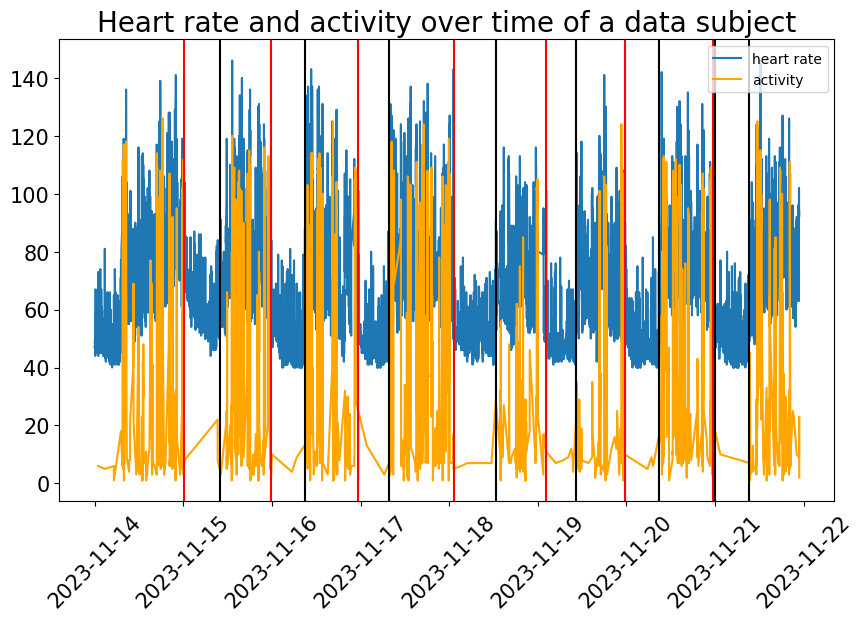

In [49]:
# sleep graph of person 1
# orange line gives the activity
# blue line gives the heart rate every minute
# the vertical red line is the beginning of the sleep cycle
# the vertical black line is the end of the sleep cycle

plt.figure(figsize=(10, 6))
plt.plot(person1_HEART_select['datetime'],person1_HEART_select['heartRate'])
plt.plot(person1_ACTIVITY_MINUTE_select['datetime'],person1_ACTIVITY_MINUTE_select['steps'],color='orange')
for line in person1_SLEEP_start_select['start']:
    plt.axvline(x=line, color='red', linestyle='-', label='Vertical Line')
for line in person1_SLEEP_start_select['stop']:
    plt.axvline(x=line, color='black', linestyle='-', label='Vertical Line')
plt.title('Heart rate and activity over time of a data subject', size = 20)
plt.xticks(size = 15, rotation = 45)
plt.yticks(size = 15)
plt.legend(['heart rate','activity'])
plt.show()

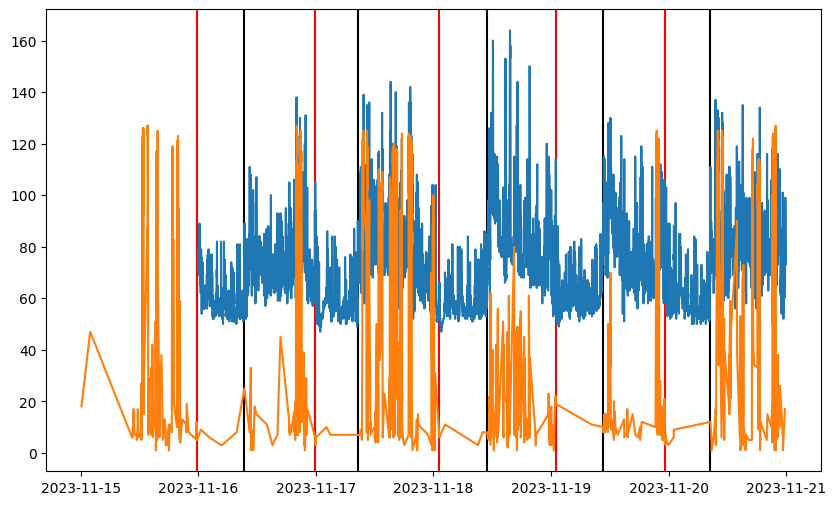

In [50]:
plt.figure(figsize=(10, 6))
for line in person3_SLEEP_start_select['start']:
    plt.axvline(x=line, color='red', linestyle='-', label='Vertical Line')
for line in person3_SLEEP_start_select['stop']:
    plt.axvline(x=line, color='black', linestyle='-', label='Vertical Line')
plt.plot(person3_HEART_select['datetime'],person3_HEART_select['heartRate'])
plt.plot(person3_ACTIVITY_MINUTE_select['datetime'],person3_ACTIVITY_MINUTE_select['steps'])

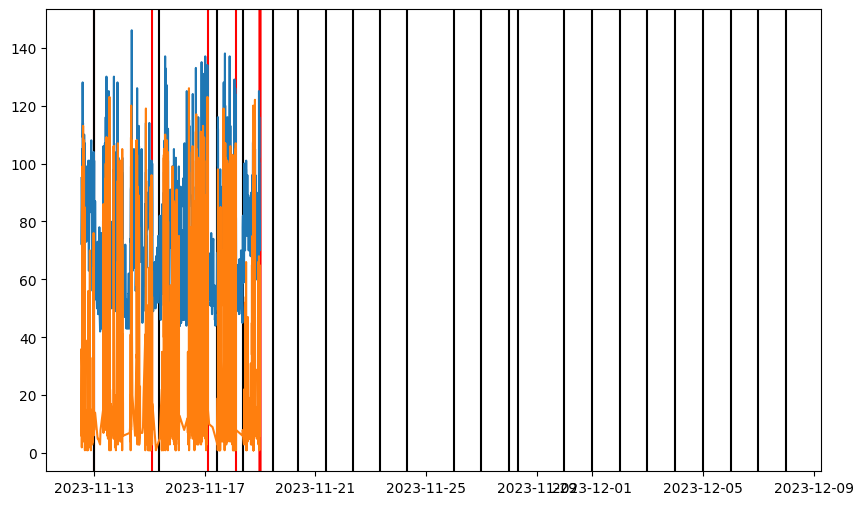

In [51]:
plt.figure(figsize=(10, 6))
for line in person4_SLEEP_start_select['start']:
    plt.axvline(x=line, color='red', linestyle='-', label='Vertical Line')
for line in person4_SLEEP_start_select['stop']:
    plt.axvline(x=line, color='black', linestyle='-', label='Vertical Line')
plt.plot(person4_HEART_select['datetime'],person4_HEART_select['heartRate'])
plt.plot(person4_ACTIVITY_MINUTE_select['datetime'],person4_ACTIVITY_MINUTE_select['steps'])

In [52]:
# adding days to treatment and control so they can be compared

person1_treatment = person1_SLEEP_start_select[0:7]
person1_treatment['days'] = [1,2,3,4,5,6,7]

person2_treatment = person2_SLEEP_start_select[0:7]
person2_treatment['days'] = [1,2,3,4,5,6,7]

person3_treatment = person3_SLEEP_start_select
person3_treatment['days'] = [1,2,3,4,5]

person4_treatment = person4_SLEEP_start_select.iloc[0:5]
person4_treatment['days'] = [1,2,3,4,5]

person1_control = person1_SLEEP_start_select_c
person1_control['days'] = [1,2,3,4,5,6,7,8,9]
person1_control = person1_control[person1_control['days'] <= 7]

person2_control = person2_SLEEP_start_select_c
person2_control['days'] = [1,2,3,4,5,6,7,8]
person2_control = person2_control[person2_control['days'] <= 7]

person3_control = person3_SLEEP_start_select_c
person3_control['days'] = [1,2,3,4,5,6]
person3_control = person3_control[person3_control['days'] <= 5]

person4_control = person4_SLEEP_start_select_c[0:5]
person4_control['days'] = [1,2,3,4,5]
person4_control = person4_control[person4_control['days'] <= 5]

C:\Users\20202478\AppData\Local\Temp\ipykernel_5880\3763270683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person1_treatment['days'] = [1,2,3,4,5,6,7]
C:\Users\20202478\AppData\Local\Temp\ipykernel_5880\3763270683.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  person2_treatment['days'] = [1,2,3,4,5,6,7]
C:\Users\20202478\AppData\Local\Temp\ipykernel_5880\3763270683.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

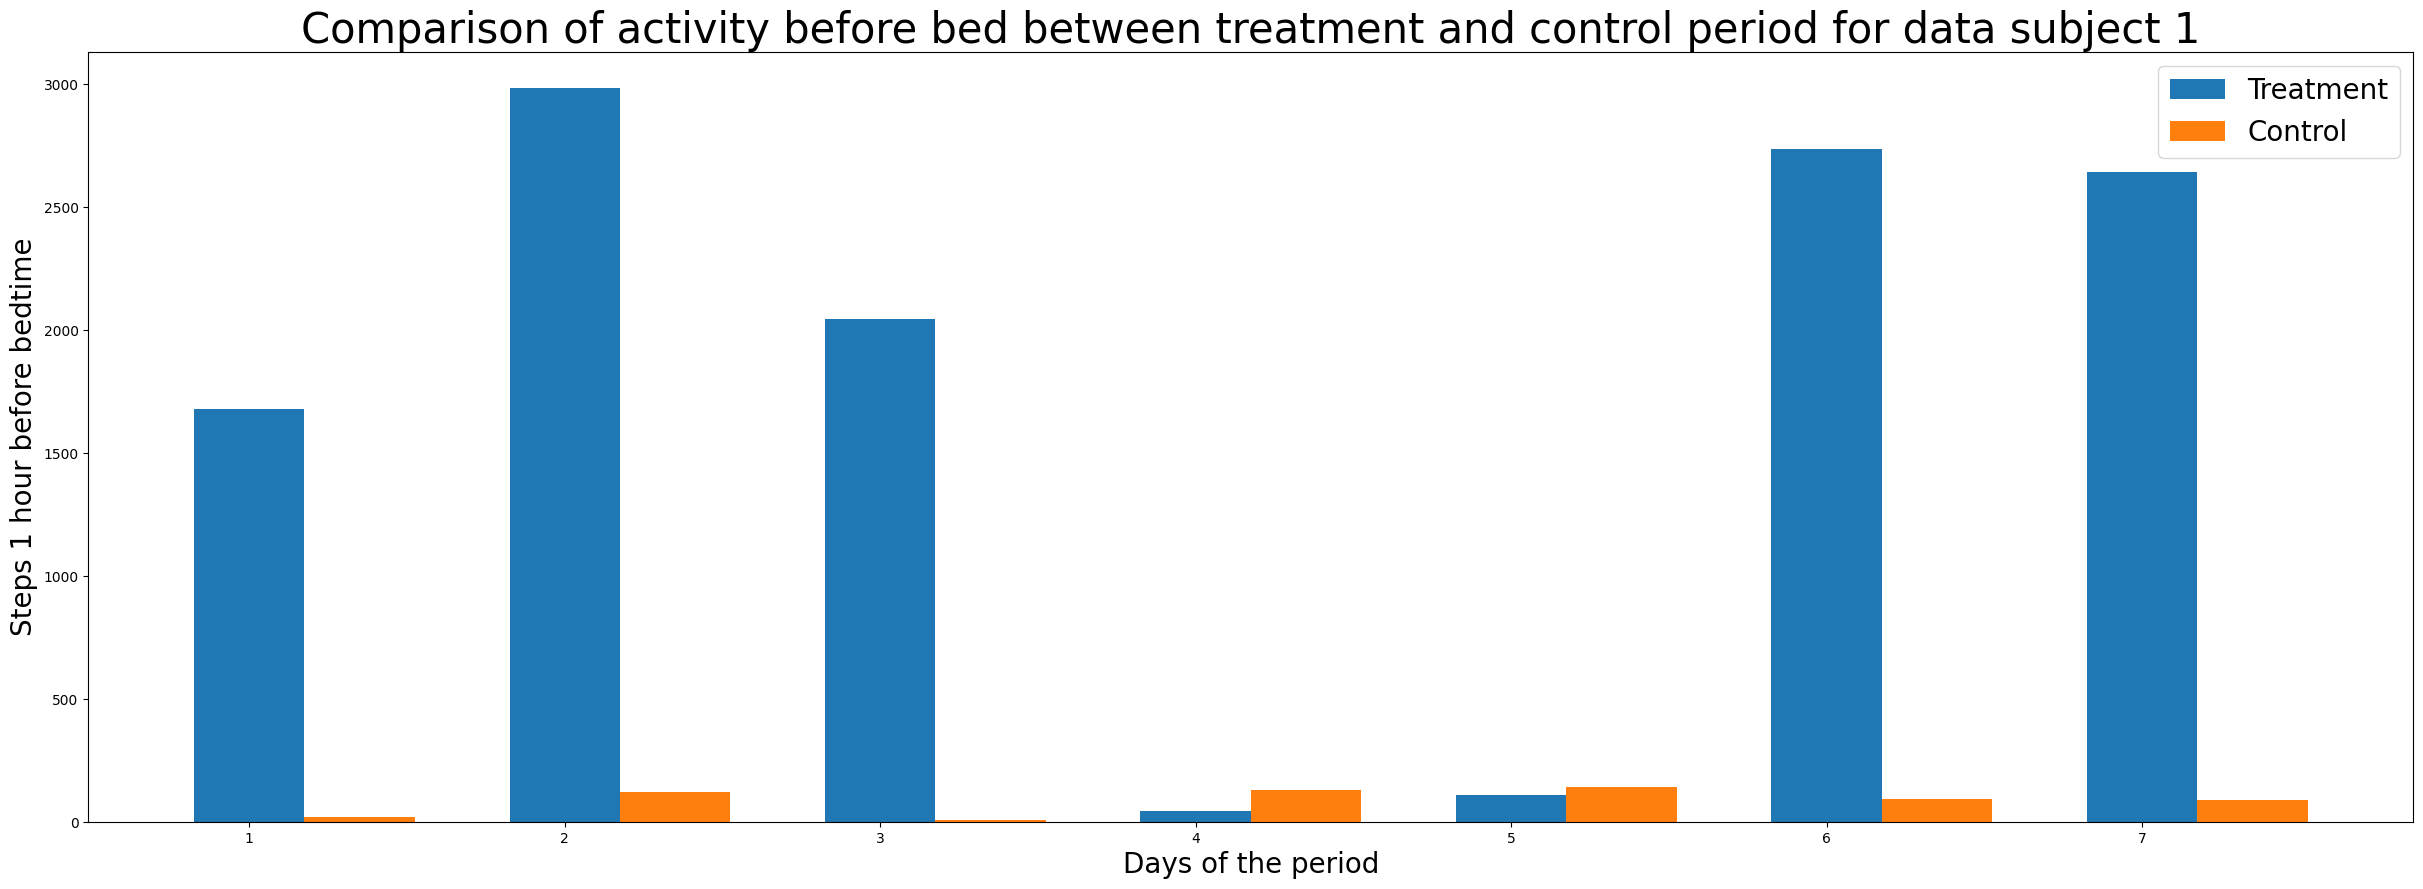

In [53]:
# Creating the bar chart that creates the number of steps during the control and treatment days.
# In order to check whether the participant walked on the treatment days. In this case subject 1

fig, ax = plt.subplots(figsize=(30, 10))

bar_width = 0.35

plt.bar(x = person1_treatment['days'], height = person1_treatment['activity_before_bed'], width=bar_width, label='Treatment')

plt.bar(x = [x + bar_width for x in person1_control['days']], height = person1_control['activity_before_bed'], width=bar_width, label='Control')

plt.xlabel('Days of the period', size = 20)
plt.ylabel('Steps 1 hour before bedtime', size = 20)
plt.title('Comparison of activity before bed between treatment and control period for data subject 1', size=30)
plt.legend(prop={'size': 20})

# Show the plot
plt.show()

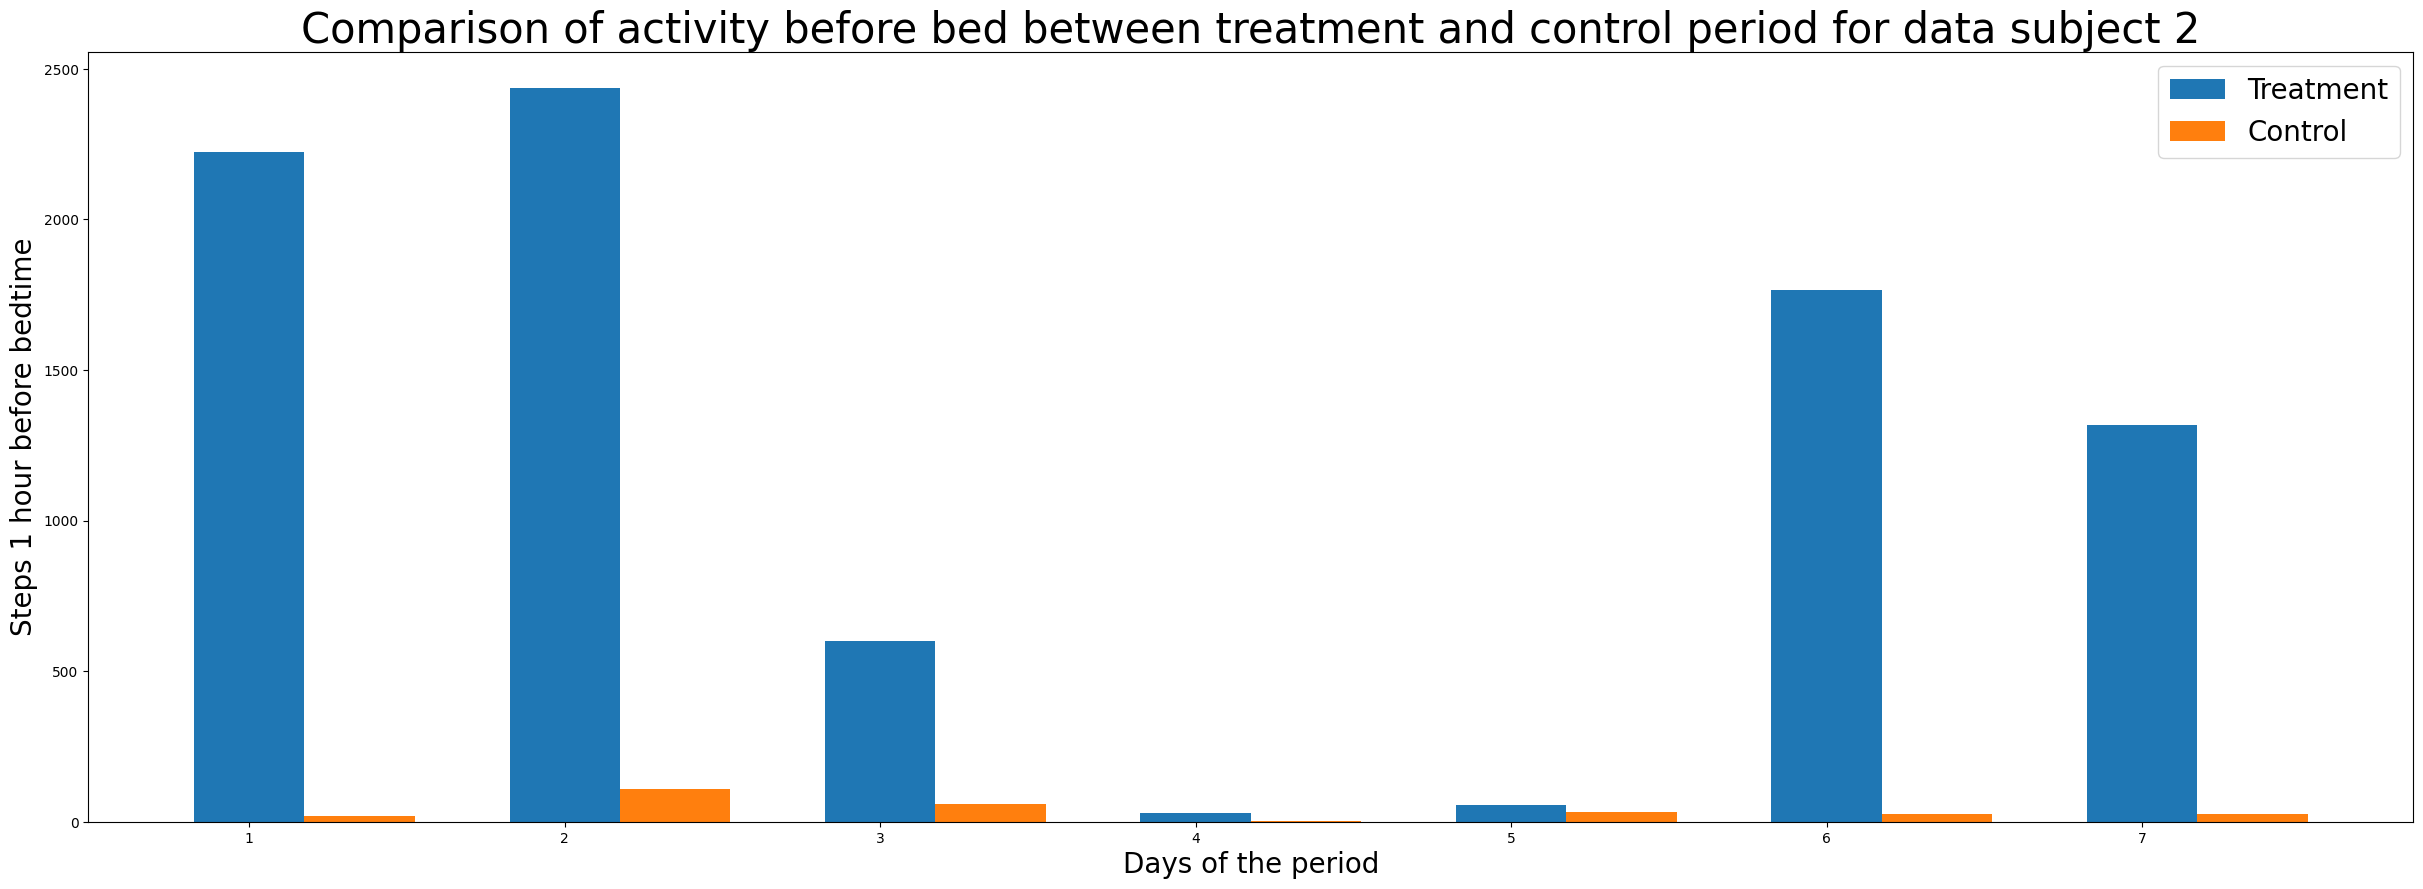

In [54]:
fig, ax = plt.subplots(figsize=(30, 10))

bar_width = 0.35

plt.bar(x = person2_treatment['days'], height = person2_treatment['activity_before_bed'], width=bar_width, label='Treatment')

plt.bar(x = [x + bar_width for x in person2_control['days']], height = person2_control['activity_before_bed'], width=bar_width, label='Control')

plt.xlabel('Days of the period', size = 20)
plt.ylabel('Steps 1 hour before bedtime', size = 20)
plt.title('Comparison of activity before bed between treatment and control period for data subject 2', size=30)
plt.legend(prop={'size': 20})

# Show the plot
plt.show()

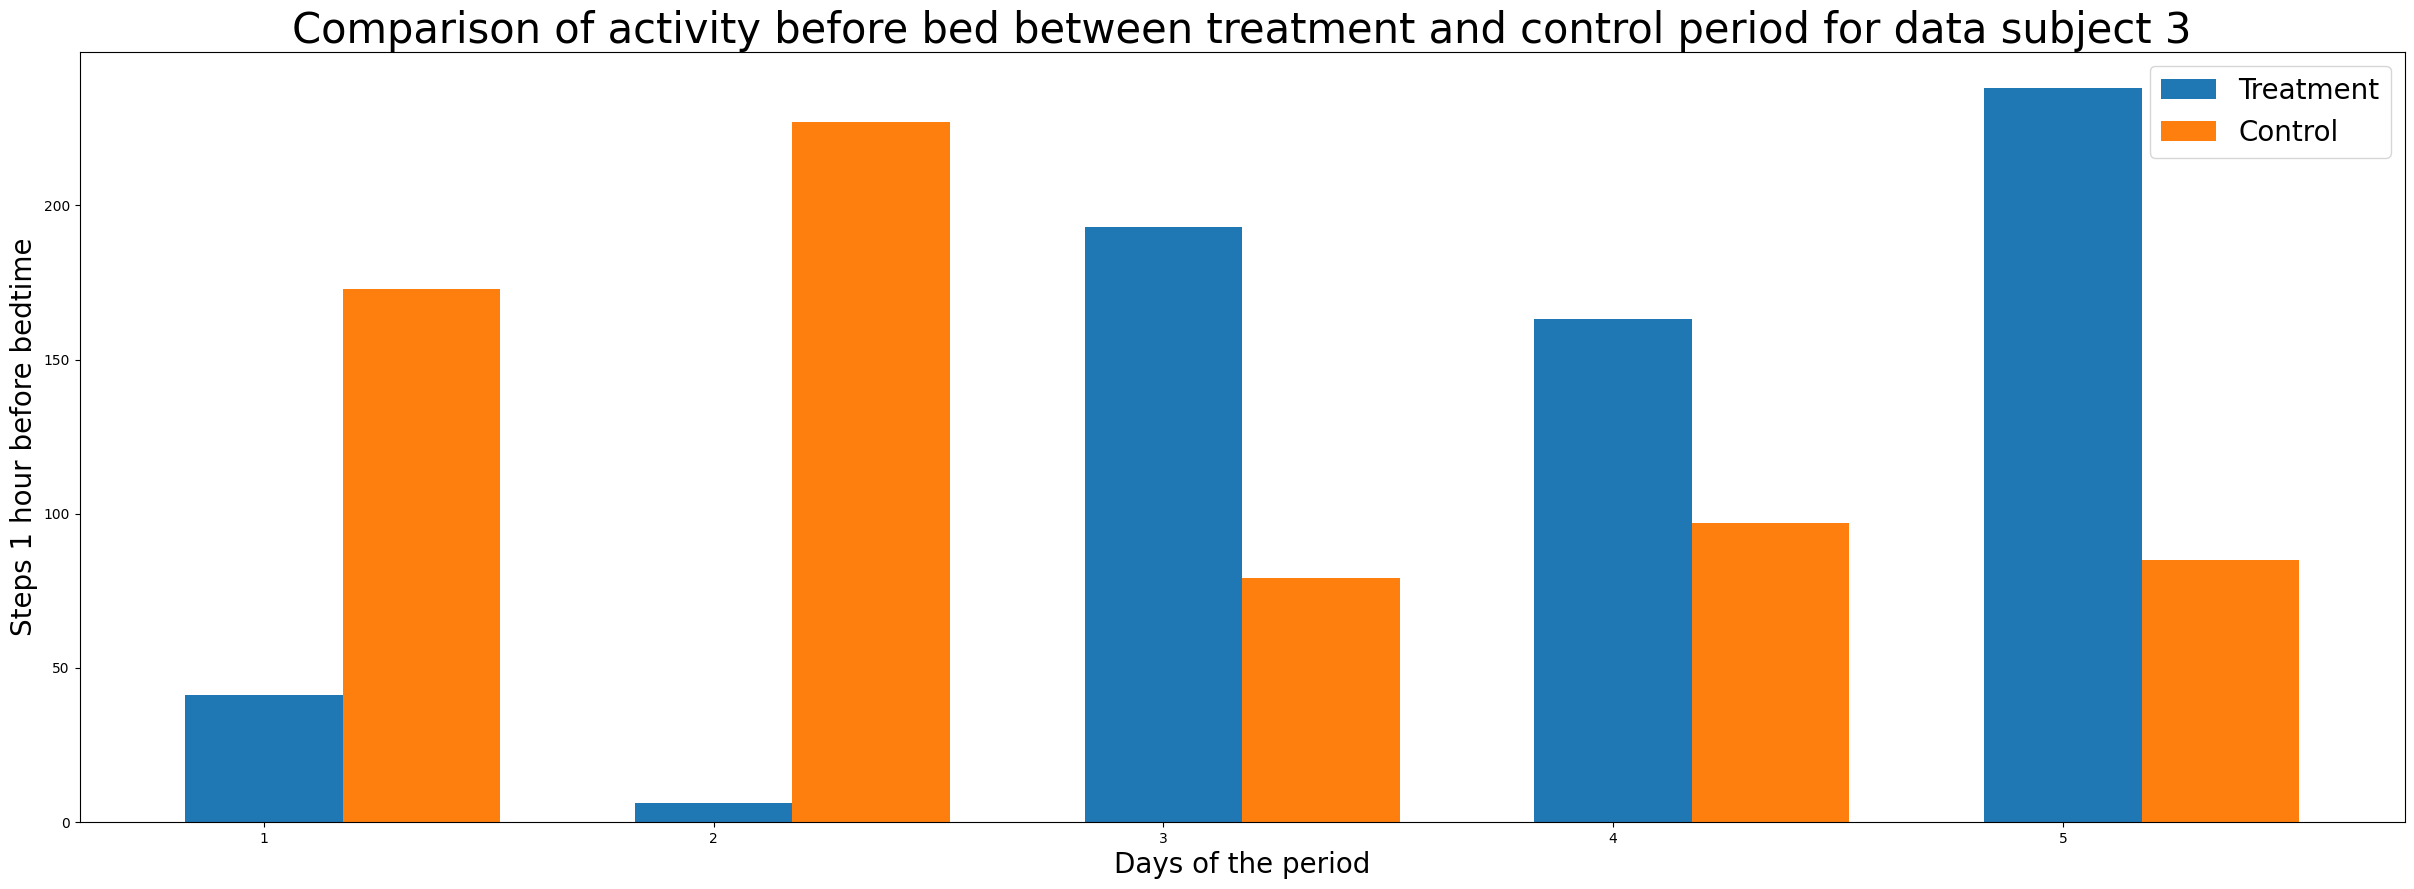

In [55]:
fig, ax = plt.subplots(figsize=(30, 10))

bar_width = 0.35

plt.bar(x = person3_treatment['days'], height = person3_treatment['activity_before_bed'], width=bar_width, label='Treatment')

plt.bar(x = [x + bar_width for x in person3_control['days']], height = person3_control['activity_before_bed'], width=bar_width, label='Control')

plt.xlabel('Days of the period', size = 20)
plt.ylabel('Steps 1 hour before bedtime', size = 20)
plt.title('Comparison of activity before bed between treatment and control period for data subject 3', size=30)
plt.legend(prop={'size': 20})

# Show the plot
plt.show()

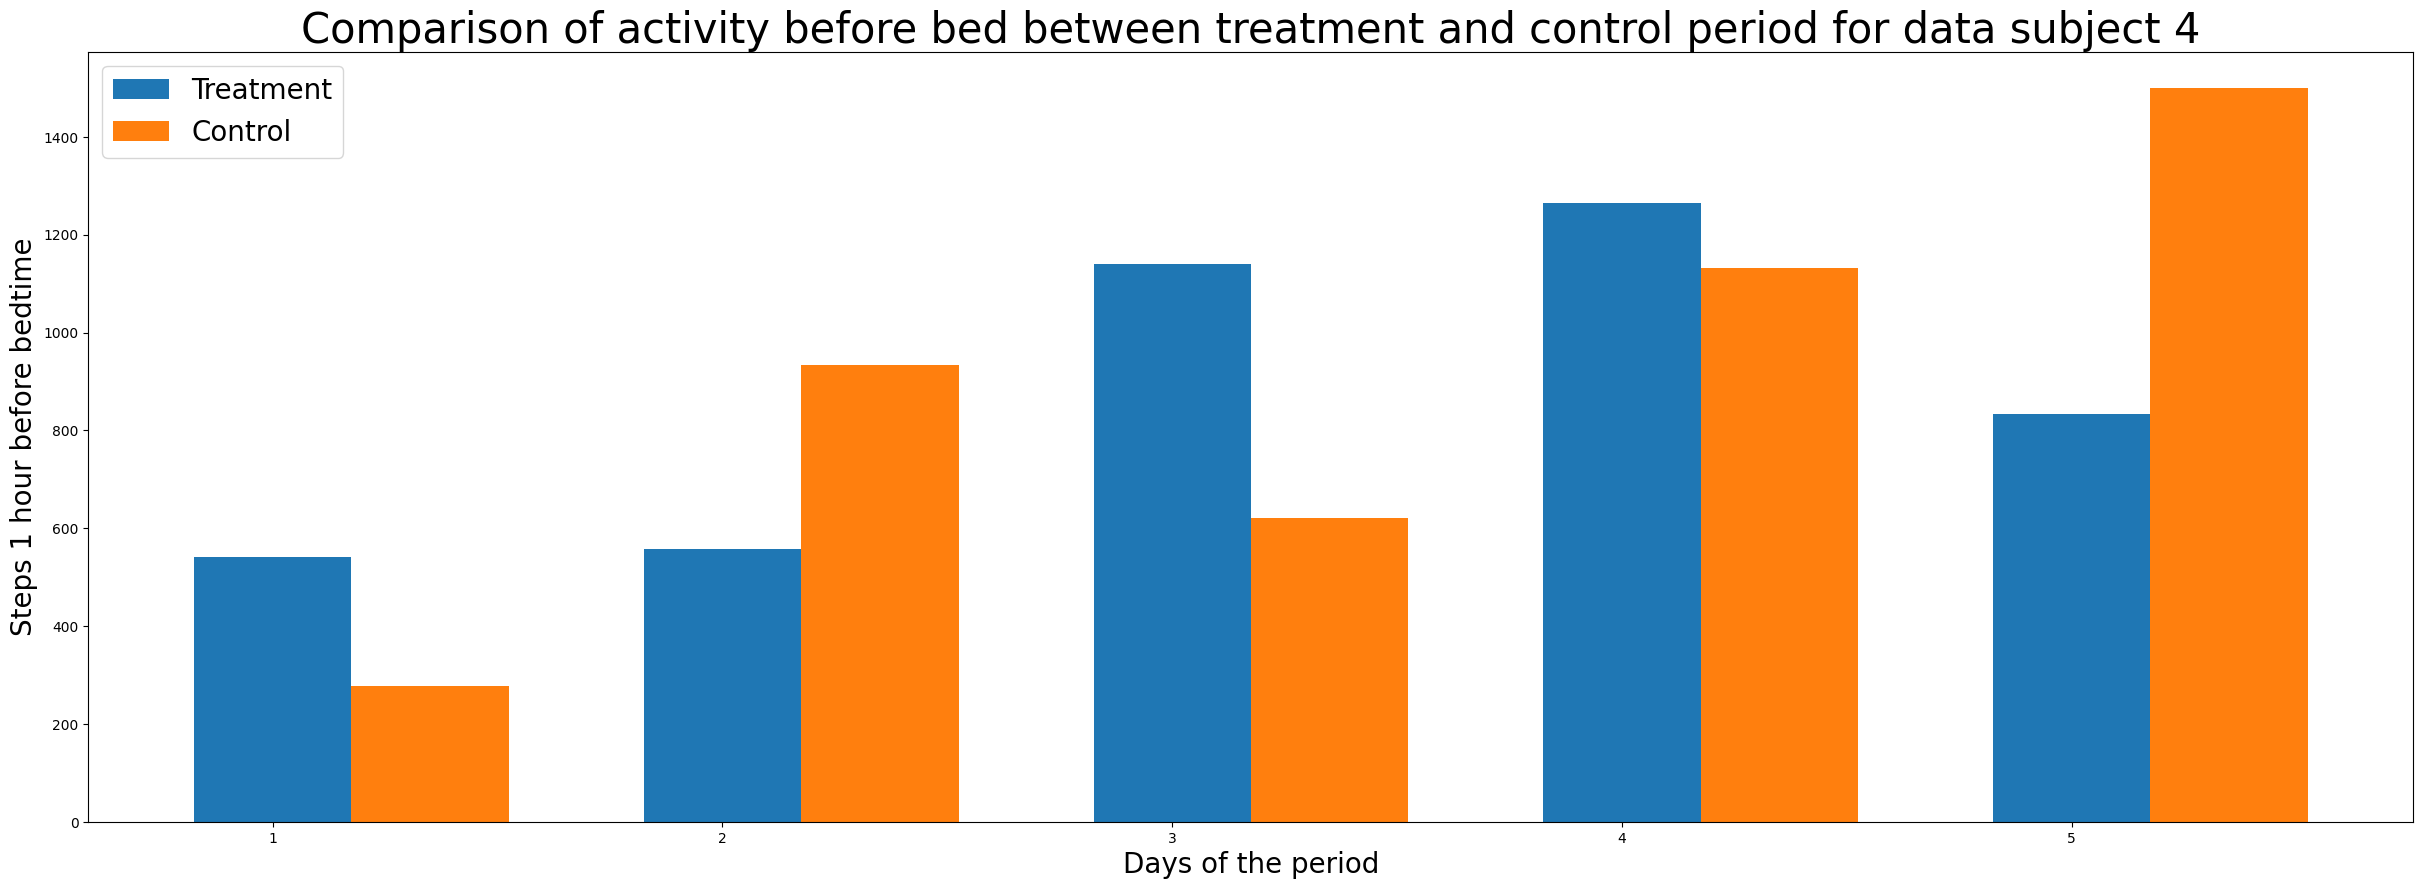

In [56]:
fig, ax = plt.subplots(figsize=(30, 10))

bar_width = 0.35

plt.bar(x = person4_treatment['days'], height = person4_treatment['activity_before_bed'], width=bar_width, label='Treatment')

plt.bar(x = [x + bar_width for x in person4_control['days']], height = person4_control['activity_before_bed'], width=bar_width, label='Control')

plt.xlabel('Days of the period', size = 20)
plt.ylabel('Steps 1 hour before bedtime', size = 20)
plt.title('Comparison of activity before bed between treatment and control period for data subject 4', size=30)
plt.legend(prop={'size': 20})

# Show the plot
plt.show()

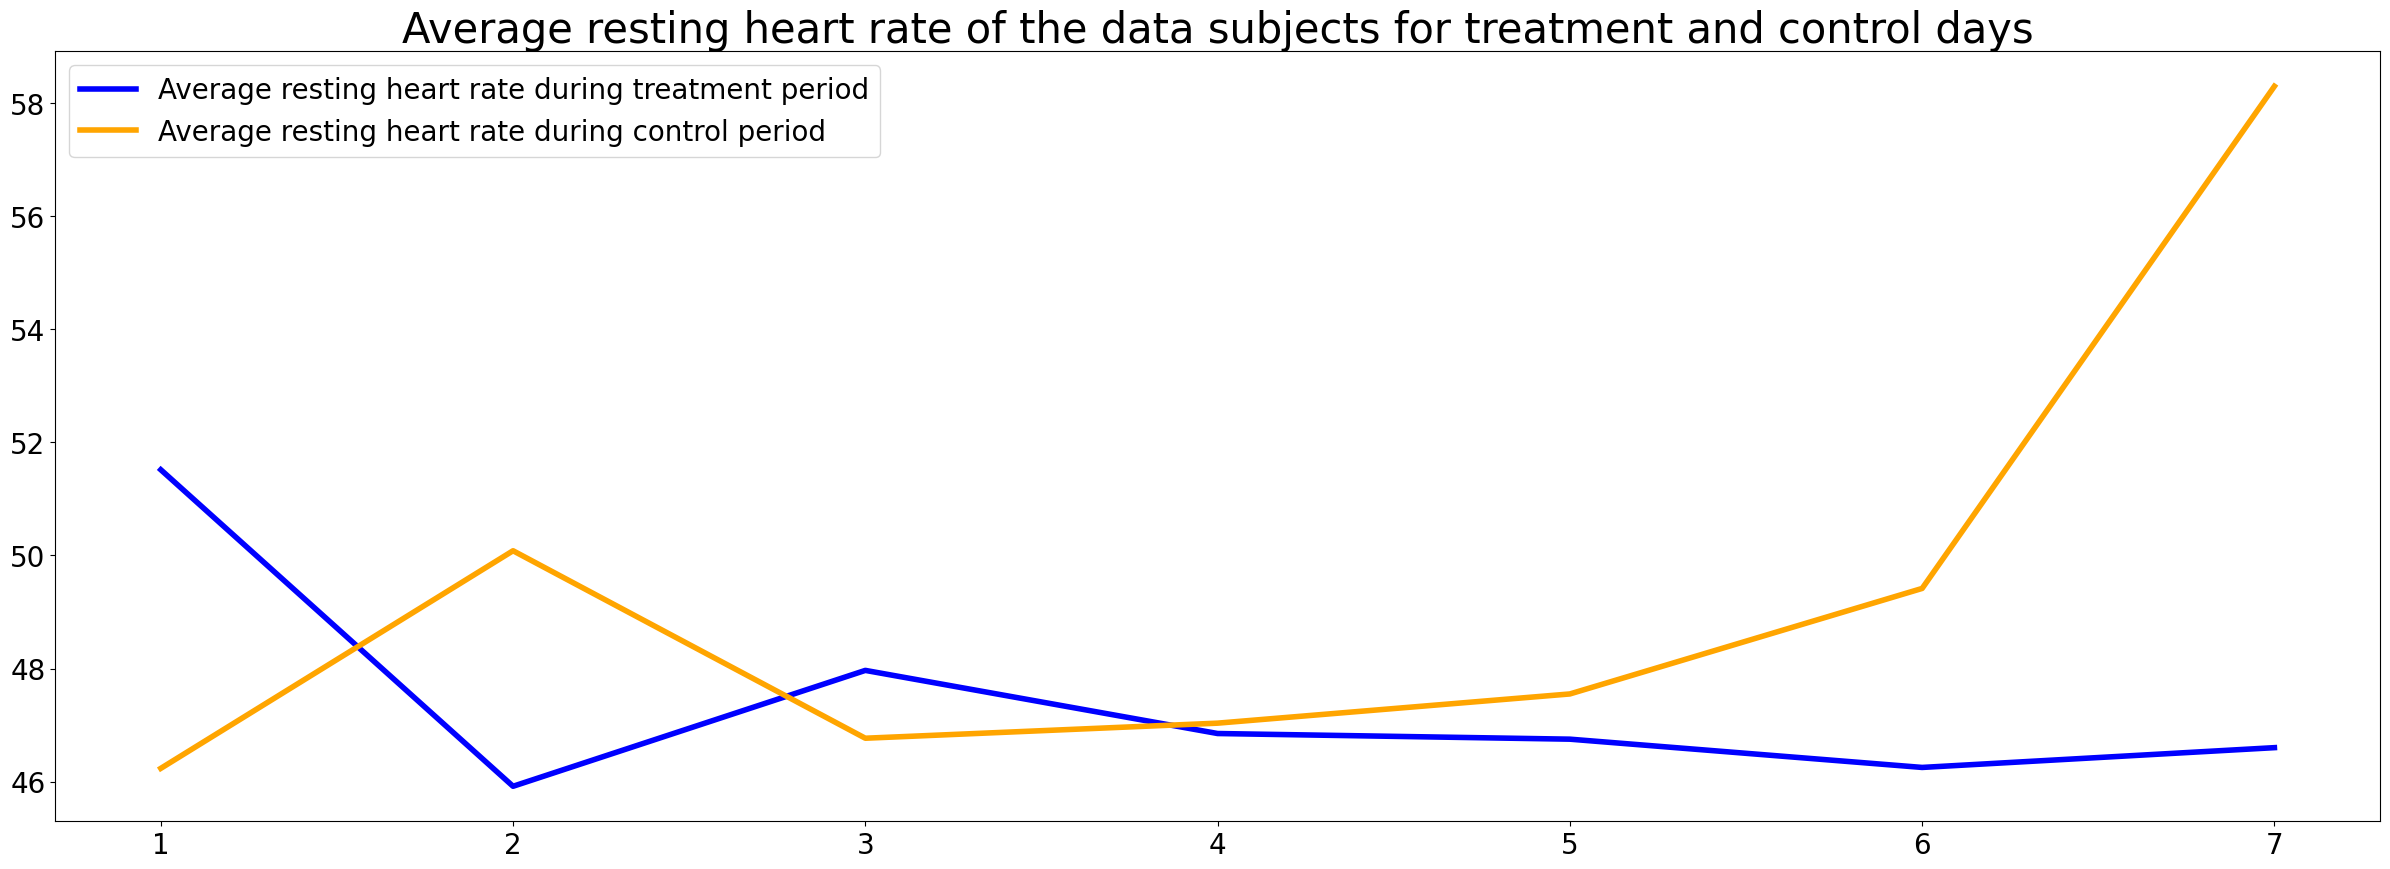

In [57]:
# Create the line graph of the resting heart rates during the days

concattreat = pd.concat([person1_treatment, person2_treatment])
treatmentgroup = concattreat.groupby('days')['lowest_30_heartrates'].mean()

concatcont = pd.concat([person1_control, person2_control])
controlgroup = concatcont.groupby('days')['lowest_30_heartrates'].mean()

fig, ax1 = plt.subplots(figsize=(30, 10))

ax1.plot(treatmentgroup, color = 'blue', linewidth=4)
ax1.plot(controlgroup, color = 'orange',linewidth=4)

plt.title('Average resting heart rate of the data subjects for treatment and control days', fontsize=30)
plt.xticks(size = 20,rotation = 0)
plt.yticks(size = 20)
plt.legend(['Average resting heart rate during treatment period','Average resting heart rate during control period'], prop={'size':20});

In [58]:
from scipy.stats import ttest_rel   # Import the library

t_statistic, p_value = ttest_rel(treatmentgroup, controlgroup)  # Use the t-test function
one_tailed_p_value = p_value / 2    # The t-test is one-tailed since we want to see whether the mean of the treatment period is smaller

print("One-tailed paired t-test results (less than):")
print("T-statistic:", t_statistic)
print("One-tailed p-value:", one_tailed_p_value)


alpha = 0.05    # Set the significance level
if one_tailed_p_value < alpha:
    print("The mean of the treatment group is significantly less than the mean of the control group.")
else:
    print("There is not enough evidence to conclude that the mean of the treatment group is less than the mean of control group.")

One-tailed paired t-test results (less than):
T-statistic: -0.9662593514998472
One-tailed p-value: 0.18561520922296734
There is not enough evidence to conclude that the mean of the treatment group is less than the mean of control group.
